# BIEN2310 Homework 3


In [38]:
!pip list | grep -E "numpy|scipy|matplotlib "

matplotlib                            3.10.0
numpy                                 2.0.2
scipy                                 1.15.3


In [ ]:
# Import packages
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Question 3

### Template

In [ ]:
# Instructions:
# - Do not change the input parameters or return value.

def antibiotic_disc(D, R, Cdisc, eps, tf, Rzone):
  n = 50  # Number of nodes, counting from r = h to r = R
  h = R / n  # Step size

  # Set the values of r at each node
  rr = np.arange(h, R + h, h)

  # Set up the initial condition below, call it Cinit
  # ---------------------------------
  ### YOUR CODE HERE ###





  # ---------------------------------

  # Solve ODE
  def f(t, C):
    # Force C to be within realistic range 0 <= C <= Cdisc
    C = np.clip(C, 0, Cdisc)

    # Compute dCdt below, using your ODEs from Part (b)
    # ---------------------------------
    ### YOUR CODE HERE ###





    # ---------------------------------

    return dCdt

  # Solve ODE using scipy.integrate.solve_ivp
  sol = solve_ivp(f, [0, tf], Cinit, method='RK45', rtol=1e-4)
  tt = sol.t
  CC = sol.y.T

  # Force C to be within realistic range 0 <= C <= Cdisc
  CC = np.clip(CC, 0, Cdisc)

  # Find the MIC by interpolation below
  # ---------------------------------
  ### YOUR CODE HERE ###





  # ---------------------------------

  # Plotting
  tindex = np.linspace(0, len(tt)-1, 20, dtype=int)  # Choose 20 time points to plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  X, Y = np.meshgrid(rr, tt[tindex])
  ax.plot_surface(X, Y, CC[tindex, :], cmap='viridis')
  ax.set_xlabel('r')
  ax.set_ylabel('t')
  ax.set_zlabel('C')
  title_str = (f'Concentration profile\n'
               f'$D={D:.2g}, R={R:.2g}, C_{{disc}}={Cdisc:.2g}, '
               f'\\epsilon={eps:.2g}, t_f={tf:.2g}, R_{{zone}}={Rzone:.2g}$')
  ax.set_title(title_str)
  ax.plot([Rzone], [tf], [MIC], 'r*')  # Overlay the MIC point
  plt.show()

  return MIC

### Answer

In [ ]:
def antibiotic_disc(D, R, Cdisc, eps, tf, Rzone):
  n = 50  # Number of nodes, counting from r = h to r = R
  h = R / n  # Step size

  # Set the values of r at each node
  rr = np.arange(h, R + h, h)

  # Set up the initial condition below, call it Cinit
  # ---------------------------------
  ### YOUR CODE HERE ###

  Cinit = np.zeros(n)
  numNodesWithinEps = int(np.floor(eps / h))  # This is e in the problem statement
  if numNodesWithinEps < 1:
      numNodesWithinEps = 1  # Set at least 1 node to avoid crashing
  if numNodesWithinEps > n:
      numNodesWithinEps = n  # Avoid crashing in case user set eps > R
  Cinit[:numNodesWithinEps] = Cdisc

  # ---------------------------------

  # Solve ODE
  def f(t, C):
      # Force C to be within realistic range 0 <= C <= Cdisc
      C = np.clip(C, 0, Cdisc)

      # Compute dCdt below, using your ODEs from Part (b)
      # ---------------------------------
      ### YOUR CODE HERE ###

      # Force C to be within realistic range 0 <= C <= Cdisc
      C = np.clip(C, 0, Cdisc)

      # Fictitious nodes on both ends
      # "No flux", so we set fictitious node equal to end node
      C0 = C[0]
      Cnplus1 = C[-1]

      # Shifted vectors
      Cleft = np.concatenate(([C0], C[:-1]))
      Cright = np.concatenate((C[1:], [Cnplus1]))

      # Compute second and first derivatives
      dC2dr2 = (Cright - 2 * C + Cleft) / (h ** 2)
      dCdr = (Cright - Cleft) / (2 * h)

      # Compute dCdt
      dCdt = D * (dC2dr2 + dCdr / rr)
      dCdt[:numNodesWithinEps] = 0

      # ---------------------------------

      return dCdt

  # Solve ODE using scipy.integrate.solve_ivp
  sol = solve_ivp(f, [0, tf], Cinit, method='RK45', rtol=1e-4)
  tt = sol.t
  CC = sol.y.T

  # Force C to be within realistic range 0 <= C <= Cdisc
  CC = np.clip(CC, 0, Cdisc)

  # Find the MIC by interpolation below
  # ---------------------------------
  ### YOUR CODE HERE ###

  Ctf = np.zeros(n)
  for i in range(n):
    Ctf[i] = np.interp(tf, tt, CC[:, i])
  MIC = np.interp(Rzone, rr, Ctf)

  # ---------------------------------

  # Plotting
  tindex = np.linspace(0, len(tt)-1, 20, dtype=int)  # Choose 20 time points to plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  X, Y = np.meshgrid(rr, tt[tindex])
  ax.plot_surface(X, Y, CC[tindex, :], cmap='viridis')
  ax.set_xlabel('r')
  ax.set_ylabel('t')
  ax.set_zlabel('C')
  title_str = (f'Concentration profile\n'
                f'$D={D:.3g}, R={R:.3g}, C_{{disc}}={Cdisc:.3g}, '
                f'\\epsilon={eps:.3g}, t_f={tf:.3g}, R_{{zone}}={Rzone:.3g}$')
  ax.set_title(title_str)
  ax.plot([Rzone], [tf], [MIC], 'r*')  # Overlay the MIC point
  plt.show()

  return MIC

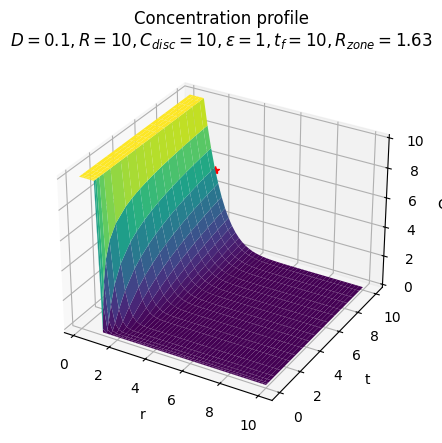

In [ ]:
# Example usage (you can modify these values for testing)
D = 0.1
R = 10
Cdisc = 10
eps = 1
tf = 10
Rzone = 1.63
MIC = antibiotic_disc(D, R, Cdisc, eps, tf, Rzone)

## Question 4

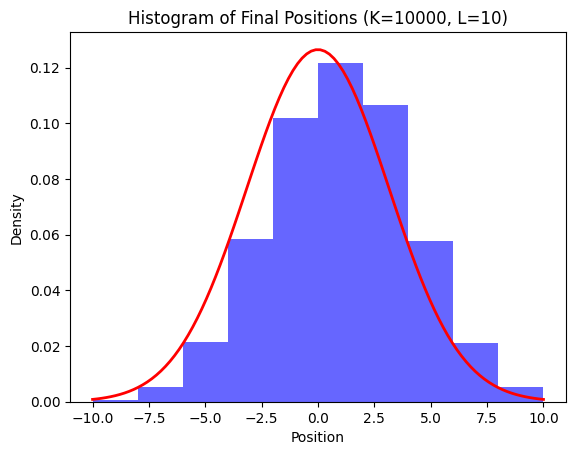

K=10000, L=10: Mean = -0.01, Std Dev = 3.15


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def randomWalk_1D(L, K):
    # Initialize K molecules at x = 0
    positions = np.zeros(K)

    # Simulate L time steps
    for _ in range(L):
        # Each molecule moves left or right by 1 with equal probability
        moves = np.random.choice([-1, 1], size=K)
        positions += moves

    # Fit to a normal distribution
    mu, sigma = norm.fit(positions)

    # Create histogram
    plt.hist(positions, density=True, alpha=0.6, color='blue')

    # Plot the fitted normal distribution
    x = np.linspace(min(positions), max(positions), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=2)

    # Add labels and title
    plt.title(f'Histogram of Final Positions (K={K}, L={L})')
    plt.xlabel('Position')
    plt.ylabel('Density')

    # Show the plot
    plt.show()

    return mu, sigma

# Example usage with different K and L values
K_values = [10000]
L_values = [10]

for K in K_values:
    for L in L_values:
        mu, sigma = randomWalk_1D(L, K)
        print(f"K={K}, L={L}: Mean = {mu:.2f}, Std Dev = {sigma:.2f}")

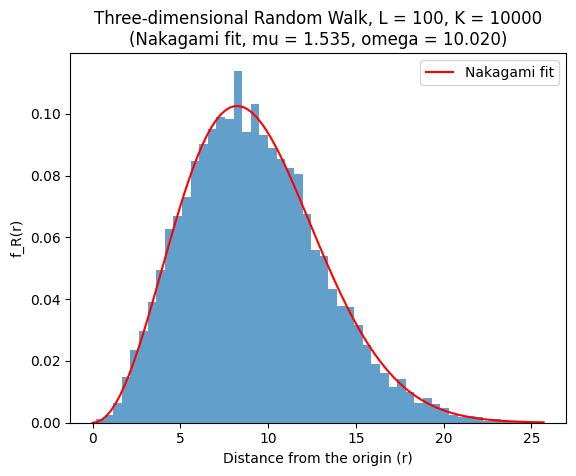

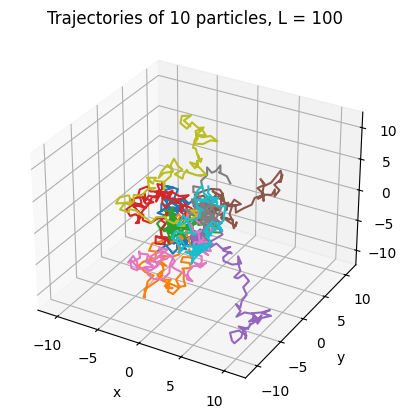

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nakagami
from mpl_toolkits.mplot3d import Axes3D

def randomWalk_3D(L, K, numPlot):
    """
    Simulate a three-dimensional random walk.

    Parameters:
    - L: Number of time steps to simulate
    - K: Number of particles to simulate
    - numPlot: Number of particles to show in a plot of trajectories

    Returns:
    - mu: Mean of the radial distances from the origin
    - omega: Standard deviation of the radial distances
    """

    locationsX = np.zeros(K)
    locationsY = np.zeros(K)
    locationsZ = np.zeros(K)

    if numPlot > K:
        numPlot = K

    # Initialize arrays to store all trajectories (time steps x particles)
    if numPlot > 0:
        pathX = np.zeros((L + 1, numPlot))  # +1 for initial position
        pathY = np.zeros((L + 1, numPlot))
        pathZ = np.zeros((L + 1, numPlot))
        pathX[0, :] = locationsX[:numPlot]  # Initial positions
        pathY[0, :] = locationsY[:numPlot]
        pathZ[0, :] = locationsZ[:numPlot]

    for i in range(L):
        theta = np.random.uniform(-np.pi, np.pi, K)
        stepsZ = np.random.uniform(-1, 1, K)
        sqrt1minusz2 = np.sqrt(1 - stepsZ**2)
        stepsX = sqrt1minusz2 * np.cos(theta)
        stepsY = sqrt1minusz2 * np.sin(theta)

        locationsX += stepsX
        locationsY += stepsY
        locationsZ += stepsZ

        if numPlot > 0:
            pathX[i + 1, :] = locationsX[:numPlot]
            pathY[i + 1, :] = locationsY[:numPlot]
            pathZ[i + 1, :] = locationsZ[:numPlot]

    # Plot histogram of radial distances
    plt.figure(1)
    r = np.sqrt(locationsX**2 + locationsY**2 + locationsZ**2)
    plt.hist(r, bins='auto', density=True, alpha=0.7)

    params = nakagami.fit(r)
    mu, omega = params[0], params[2]
    rr = np.linspace(0, np.max(r), 100)
    plt.plot(rr, nakagami.pdf(rr, mu, loc=0, scale=omega), 'r-', label='Nakagami fit')

    plt.xlabel('Distance from the origin (r)')
    plt.ylabel('f_R(r)')
    plt.title(f'Three-dimensional Random Walk, L = {L}, K = {K}\n(Nakagami fit, mu = {mu:.3f}, omega = {omega:.3f})')
    plt.legend()

    # Plot 3D trajectories
    if numPlot > 0:
        fig = plt.figure(2)
        ax = fig.add_subplot(111, projection='3d')

        for i in range(numPlot):
            ax.plot(pathX[:, i], pathY[:, i], pathZ[:, i])  # Plot each particle's full trajectory

        d = max(np.max(np.abs(pathX)), np.max(np.abs(pathY)), np.max(np.abs(pathZ)))
        ax.set_xlim([-d, d])
        ax.set_ylim([-d, d])
        ax.set_zlim([-d, d])

        ax.grid(True)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title(f'Trajectories of {numPlot} particles, L = {L}')

    plt.show()

    return mu, omega

# Run the simulation
mu, omega = randomWalk_3D(100, 10000, 10)